<a href="https://colab.research.google.com/github/elizabethasuncion/python-project-world-pop-data/blob/main/5_World_Population_Data_Elizabeth_Asuncion_23_04_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse World Population Data

## Task

Find out what might make countries better.
1. Have a look at the variables, understand what they are.
2. Pick a variable which interests you in a country.
2. Which other variables are associated with your target variable? Formulate several hypotheses.
3. Explore each hypothesis.
    - Make plots and/or compute statistics.
    - Write a short conclusion, refer to the justifications you found in the data.

## Dataset description

_Source: https://www.kaggle.com/datasets/madhurpant/world-population-data
  (See the bottom of this notebook for the steps to re-create it)_

This dataset describes 192 countries and their populations. Here are the columns, grouped by topic:

1. Height and weight:
    - male_height
    - female_height
    - male_weight
    - female_weight
    - male_bmi
    - female_bmi

2. Life expectancy:
    - male_life_expectancy
    - female_life_expectancy
    - birth_rate
    - death_rate

3. Population density:
    - area
    - population
    - pop_per_km_sq

4. Quality of life:
    - stability
    - rights
    - health
    - safety
    - climate
    - costs
    - popularity

5. Other:
    - iq
    - education_expenditure_per_inhabitant
    - daily_max_temp


## Analysis

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import scipy

# From https://drive.google.com/file/d/181fFa4h4EigLpMlyu3DXaptm41tXVrNS/view
df = pd.read_csv(
    "https://drive.google.com/uc?id=181fFa4h4EigLpMlyu3DXaptm41tXVrNS",
    index_col=0,
)
df.shape

(192, 23)

In [ ]:
df.columns

Index(['male_life_expectancy', 'female_life_expectancy', 'birth_rate',
       'death_rate', 'iq', 'education_expenditure_per_inhabitant',
       'daily_max_temp', 'stability', 'rights', 'health', 'safety', 'climate',
       'costs', 'popularity', 'area', 'population', 'pop_per_km_sq',
       'male_height', 'female_height', 'male_weight', 'female_weight',
       'male_bmi', 'female_bmi'],
      dtype='object')

In [ ]:
df[df.columns[::-1]].head()

,female_bmi,male_bmi,female_weight,male_weight,female_height,male_height,pop_per_km_sq,population,area,popularity,...,health,rights,stability,daily_max_temp,education_expenditure_per_inhabitant,iq,death_rate,birth_rate,female_life_expectancy,male_life_expectancy
country,,,,,,,,,,,,,,,,,,,,,
Hong Kong,23.8,24.5,61.1,74.4,160.0,174.0,NaN,NaN,NaN,52.0,...,100.0,85.0,77.0,26.2,915,108.0,6.8,5.8,88.0,82.9
Iceland,25.6,27.1,72.6,89.2,168.0,181.0,NaN,NaN,NaN,33.0,...,87.0,92.0,82.0,8.1,"2,443",101.0,7.8,12.3,84.5,81.7
Japan,21.9,23.6,54.8,69.5,158.0,172.0,332.5,125.68 M,377970.0,41.0,...,92.0,86.0,87.0,19.2,"1,258",105.0,8.8,6.8,87.7,81.6
Norway,26.2,27.4,72.6,89.1,166.0,180.0,14.0,5.41 M,385203.0,37.0,...,90.0,99.0,89.0,9.0,"3,527",99.0,9.8,9.8,84.9,81.6
Singapore,23.2,24.3,60.2,72.8,161.0,173.0,7584.9,5.45 M,719.0,42.0,...,79.0,89.0,83.0,31.5,908,108.0,10.8,8.5,86.1,81.5


In [ ]:
df['education_expenditure_per_inhabitant'].str.replace(',','')
df['education_expenditure_per_inhabitant'] = df['education_expenditure_per_inhabitant'].str.replace(',','')
df['education_expenditure_per_inhabitant'] = df['education_expenditure_per_inhabitant'].astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, Hong Kong to Micronesia
Data columns (total 23 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   male_life_expectancy                  115 non-null    float64
 1   female_life_expectancy                115 non-null    float64
 2   birth_rate                            115 non-null    float64
 3   death_rate                            115 non-null    float64
 4   iq                                    108 non-null    float64
 5   education_expenditure_per_inhabitant  103 non-null    Int64  
 6   daily_max_temp                        108 non-null    float64
 7   stability                             137 non-null    float64
 8   rights                                137 non-null    float64
 9   health                                137 non-null    float64
 10  safety                                137 non-null    float64
 11  climate  

In [ ]:
df.describe()

,male_life_expectancy,female_life_expectancy,birth_rate,death_rate,iq,education_expenditure_per_inhabitant,daily_max_temp,stability,rights,health,...,costs,popularity,area,pop_per_km_sq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi
count,115.000000,115.000000,115.000000,115.000000,108.000000,103.0,108.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,9.100000e+01,91.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,72.004348,76.963478,16.917391,8.197391,86.574074,579.932039,23.934259,57.576642,50.686131,58.124088,...,52.343066,37.036496,9.927113e+05,1028.663736,173.666667,161.277778,78.946825,68.940476,26.069048,26.420635
std,7.261318,7.548188,9.091969,3.314732,13.176873,782.630009,7.989504,19.328706,25.142755,26.093284,...,11.612897,11.121263,2.717587e+06,3184.350409,5.323157,4.593280,11.270930,9.773042,2.680999,2.962359
min,51.500000,55.900000,5.300000,1.300000,56.000000,3.0,7.300000,8.000000,7.000000,0.000000,...,23.000000,11.000000,4.000000e-01,3.300000,159.000000,151.000000,53.900000,49.000000,20.100000,21.000000
25%,67.550000,73.500000,9.850000,6.000000,81.000000,37.5,17.675000,46.000000,32.000000,42.000000,...,44.000000,31.000000,5.800000e+02,93.550000,170.000000,158.000000,70.150000,62.250000,24.325000,24.625000
50%,73.200000,78.600000,13.500000,7.600000,88.000000,167.0,25.700000,57.000000,45.000000,63.000000,...,54.000000,36.000000,4.292000e+04,297.400000,174.000000,161.000000,81.500000,70.400000,26.600000,26.300000
75%,78.150000,82.950000,21.150000,9.950000,98.000000,896.5,30.925000,72.000000,72.000000,80.000000,...,61.000000,42.000000,4.614350e+05,535.750000,178.000000,165.000000,87.525000,74.000000,27.600000,27.700000
max,82.900000,88.000000,41.400000,18.000000,108.000000,3527.0,36.500000,93.000000,100.000000,100.000000,...,76.000000,73.000000,1.709825e+07,21657.600000,184.000000,170.000000,103.700000,98.100000,33.100000,35.200000


<ipython-input-6-8d22b530fc09>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method="kendall"), annot=True, fmt=".3f", ax=ax);


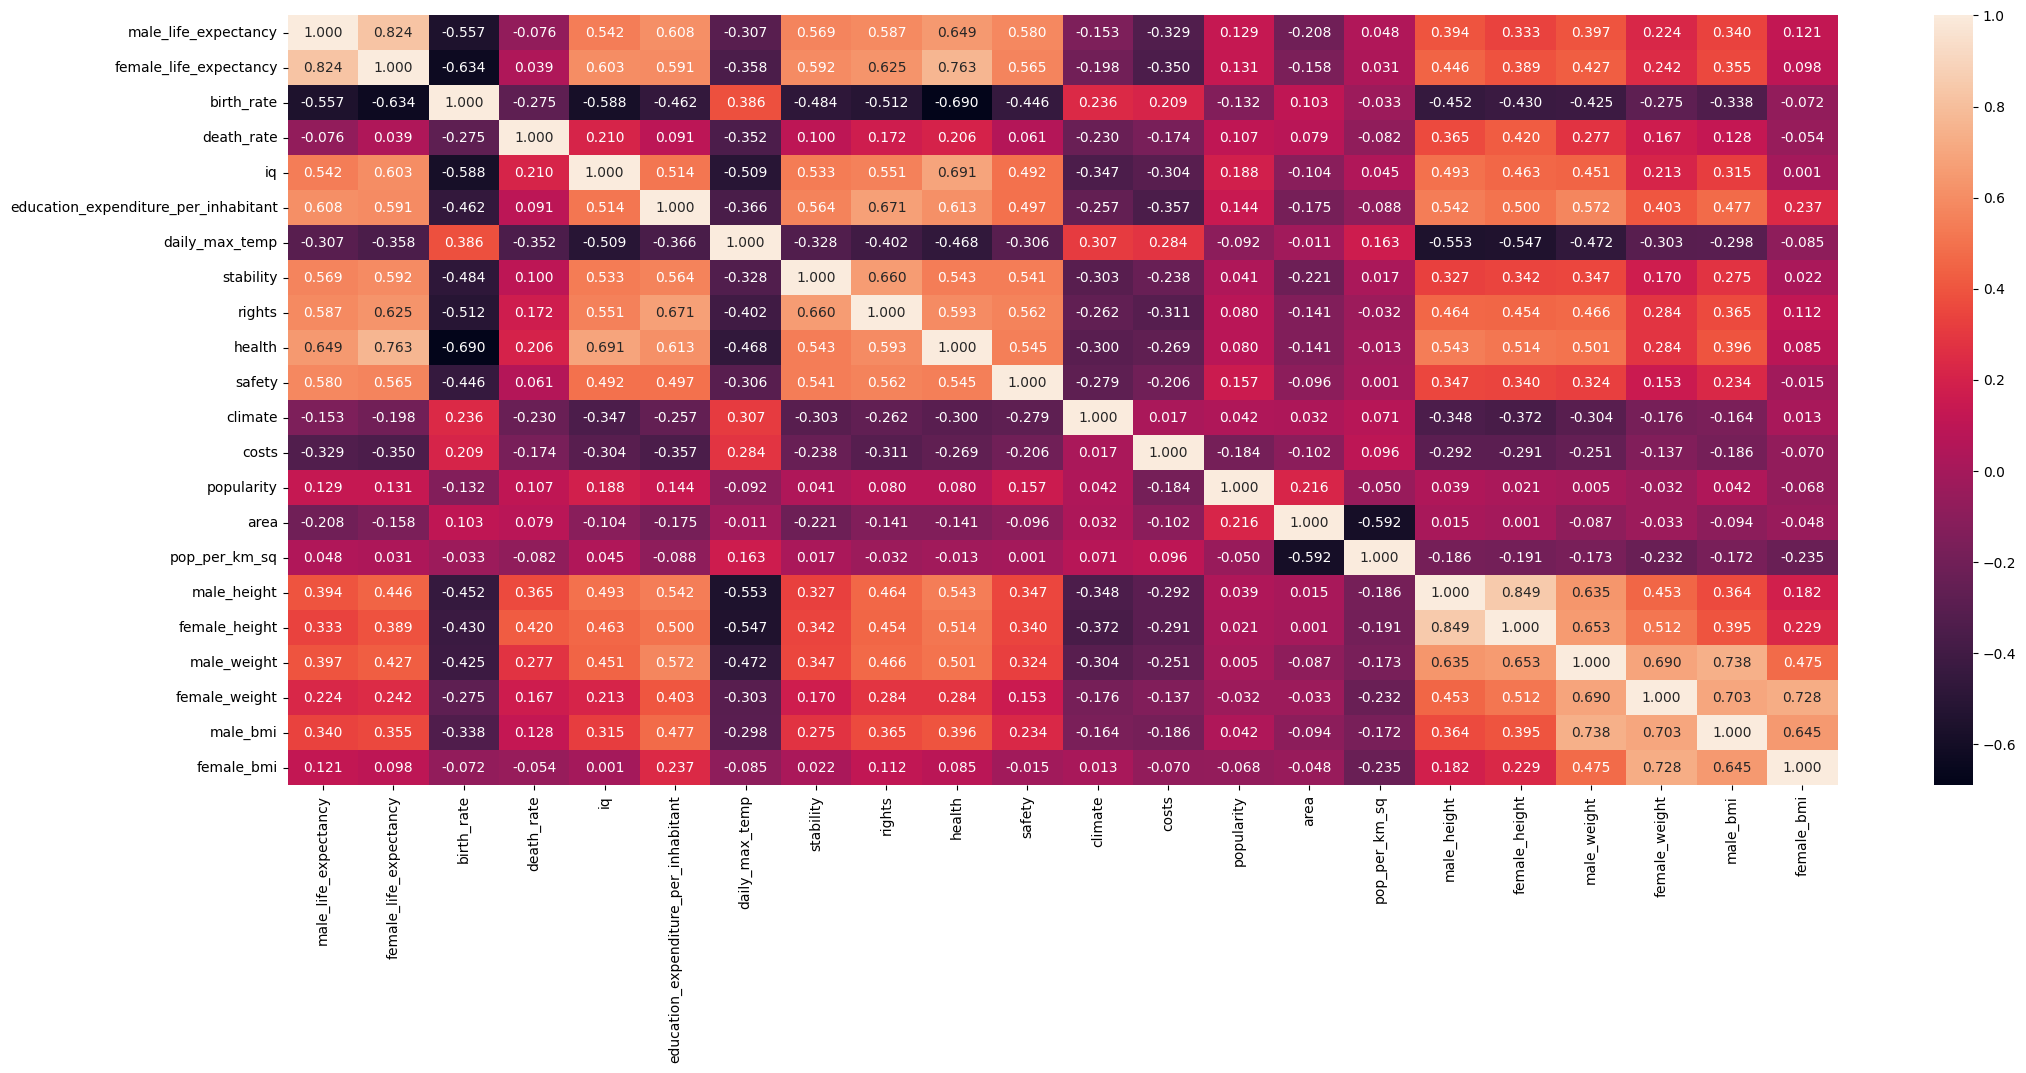

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df.corr(method="kendall"), annot=True, fmt=".3f", ax=ax);

In [ ]:
correlations1 = df.corr()['iq'].dropna()
print(correlations1.sort_values(ascending=False))

iq                                      1.000000
health                                  0.869019
female_life_expectancy                  0.829022
male_life_expectancy                    0.766763
rights                                  0.713391
male_weight                             0.662960
stability                               0.656473
male_height                             0.644242
safety                                  0.633862
male_bmi                                0.597253
female_height                           0.570142
education_expenditure_per_inhabitant    0.553962
female_weight                           0.384319
death_rate                              0.251691
popularity                              0.190571
pop_per_km_sq                           0.190443
female_bmi                              0.154940
area                                    0.117146
costs                                  -0.384106
climate                                -0.449391
daily_max_temp      

<ipython-input-39-f6034338383d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations1 = df.corr()['iq'].dropna()


Hypothesis

In [ ]:
columns_of_interest1 = ['iq', 'health', 'birth_rate',
        'male_life_expectancy', 'female_life_expectancy', 
        'death_rate', 'male_height', 'female_height', 
        'male_weight', 'female_weight','male_bmi', 'female_bmi']
df_iq_health = df[columns_of_interest1]

<Axes: >

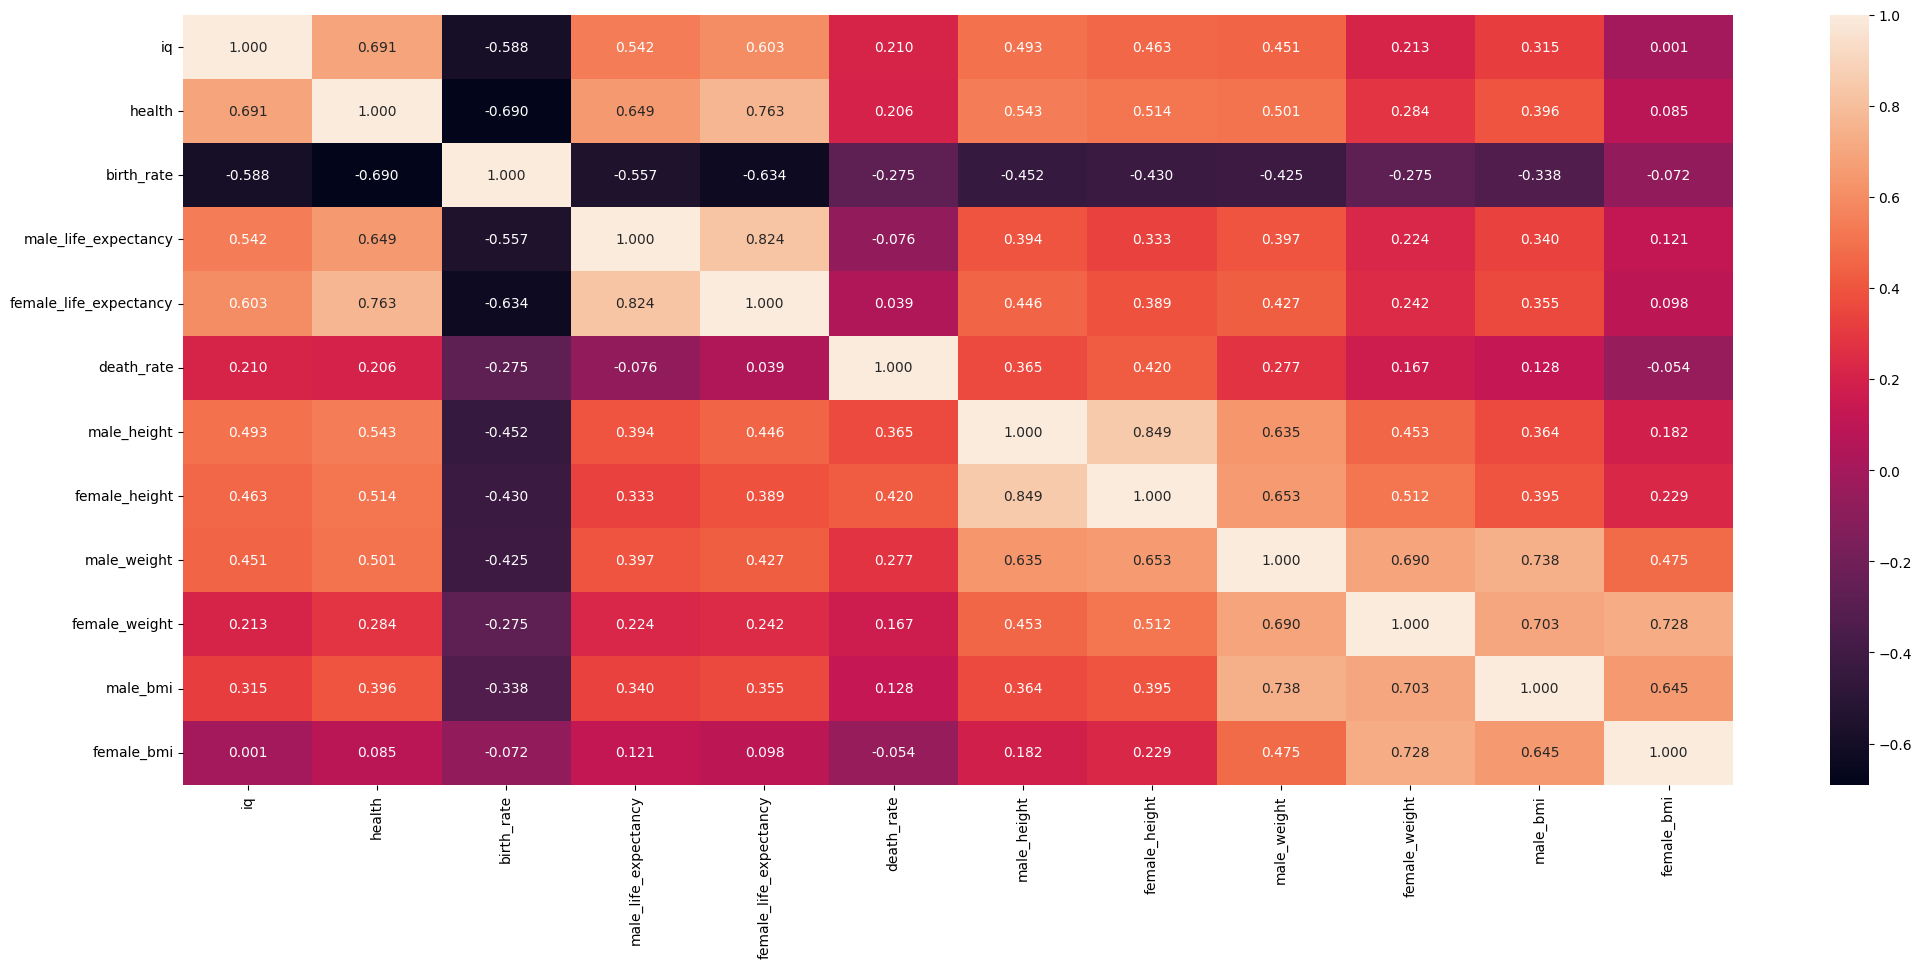

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df_iq_health.corr(method="kendall"), annot=True, fmt=".3f", ax=ax)


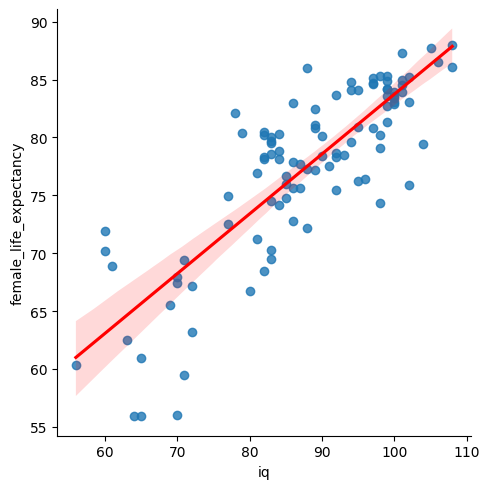

In [ ]:
sns.lmplot(data=df_iq_health, x= 'iq', y= 'female_life_expectancy', line_kws = {'color': 'red'} )


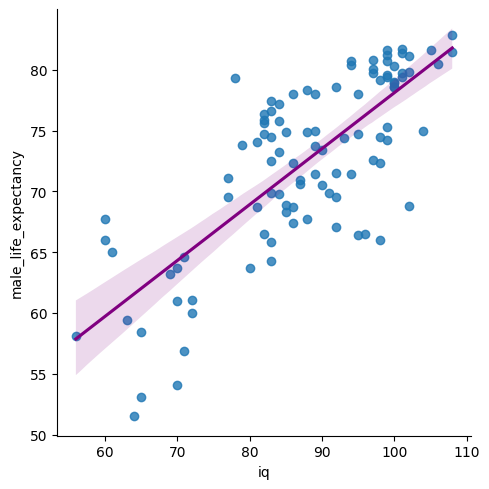

In [ ]:
sns.lmplot(data=df_iq_health, x= 'iq', y= 'male_life_expectancy', line_kws = {'color': 'purple'})

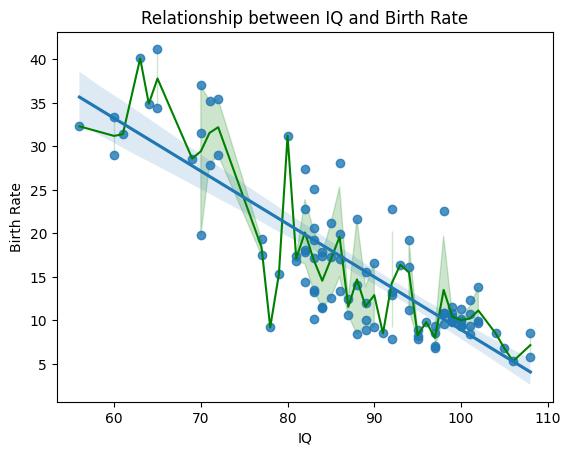

In [ ]:
sns.lineplot(data = df_iq_health, x= 'iq', y= 'birth_rate', color = 'green' )
sns.regplot(data = df_iq_health, x= 'iq', y= 'birth_rate' )
plt.xlabel('IQ')
plt.ylabel('Birth Rate')
plt.title('Relationship between IQ and Birth Rate')
plt.show()

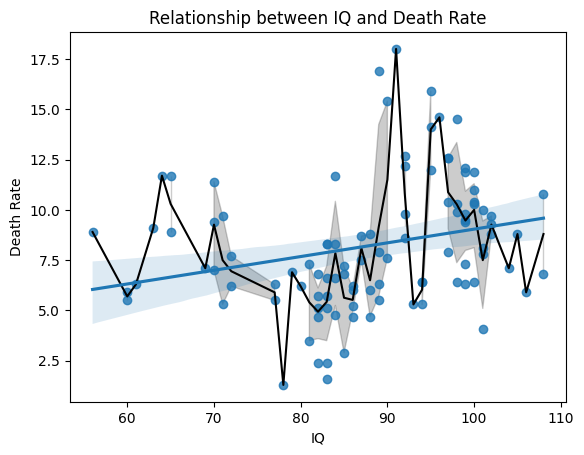

In [ ]:
sns.lineplot(data = df_iq_health, x= 'iq', y= 'death_rate', color = 'black' )
sns.regplot(data = df_iq_health, x= 'iq', y= 'death_rate' )
plt.xlabel('IQ')
plt.ylabel('Death Rate')
plt.title('Relationship between IQ and Death Rate')
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.appen

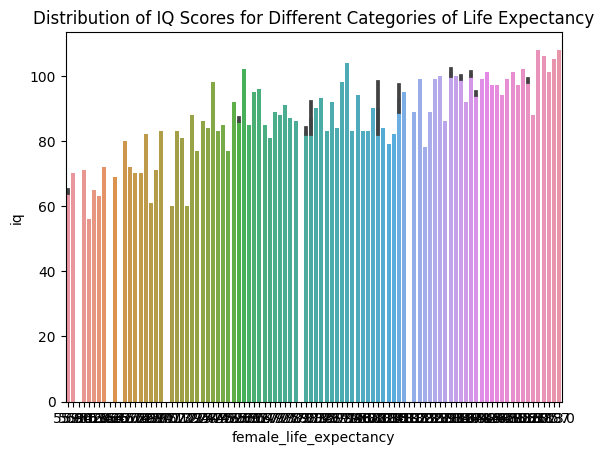

In [ ]:
sns.barplot(data = df_iq_health, x='female_life_expectancy', y= 'iq')
plt.title('Distribution of IQ Scores for Different Categories of Life Expectancy')
plt.show()

In [ ]:
df['iq'].min()

56.0

<Axes: xlabel='female_life_expectancy', ylabel='iq'>

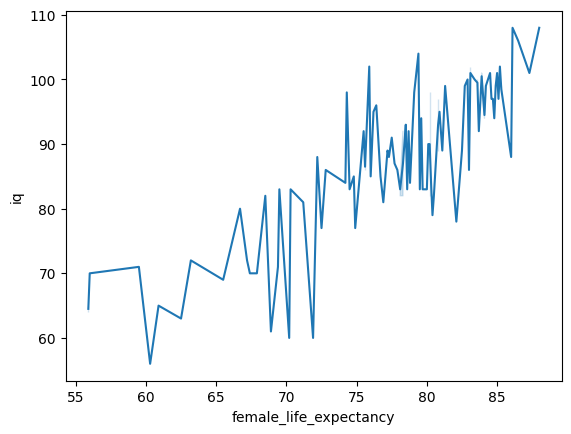

In [ ]:
sns.lineplot(data = df_iq_health, x='female_life_expectancy', y= 'iq')

<Axes: >

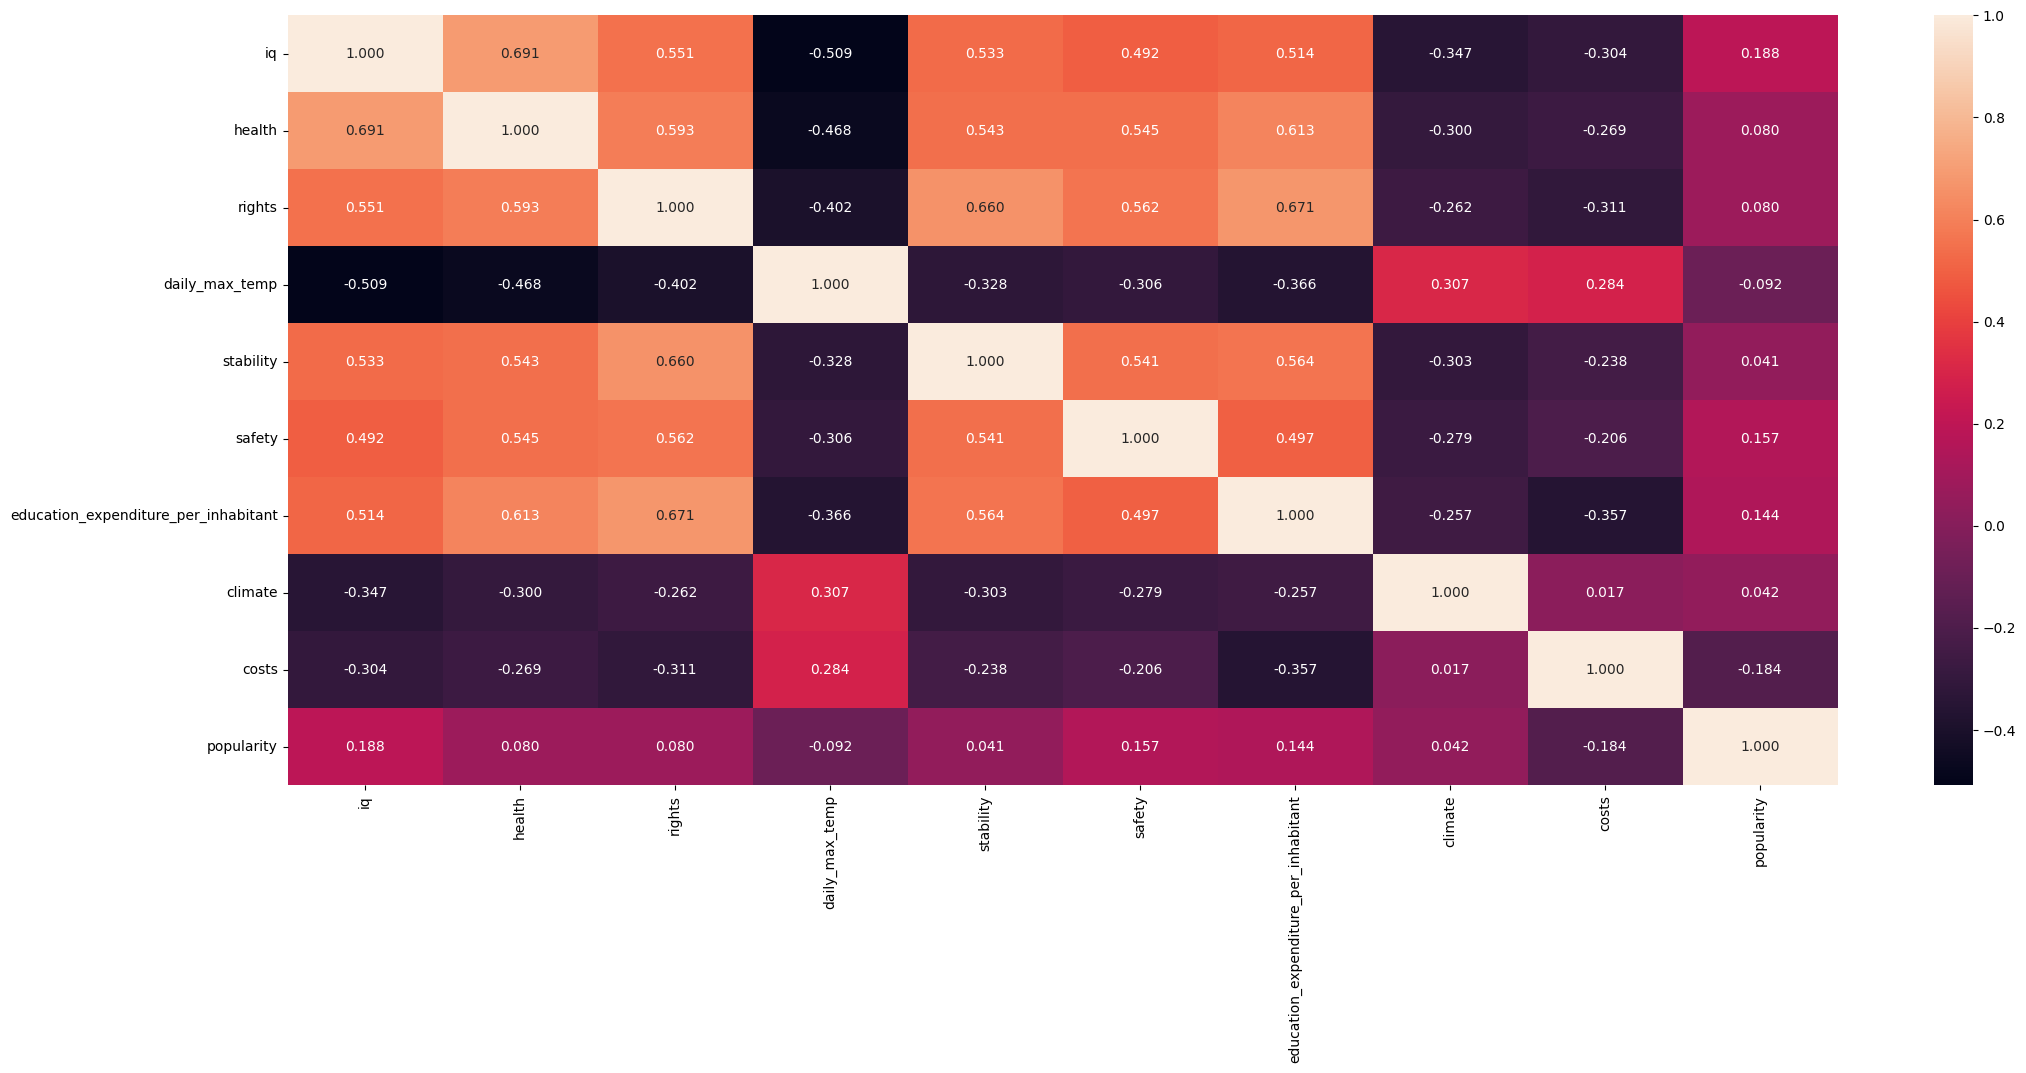

In [ ]:
columns_of_interest2 = ['iq',  'health', 'rights',  'daily_max_temp', 
        'stability','safety','education_expenditure_per_inhabitant', 
        'climate', 'costs', 'popularity']
df_iq_quality = df[columns_of_interest2]
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df_iq_quality.corr(method="kendall"), annot=True, fmt=".3f", ax=ax)

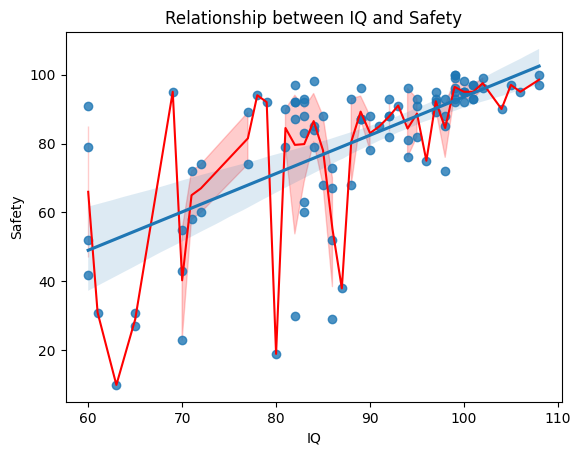

In [ ]:
sns.lineplot(data = df_iq_quality, x= 'iq', y= 'safety', color = 'red' )
sns.regplot(data = df_iq_quality, x= 'iq', y= 'safety' )
plt.xlabel('IQ')
plt.ylabel('Safety')
plt.title('Relationship between IQ and Safety')
plt.show()

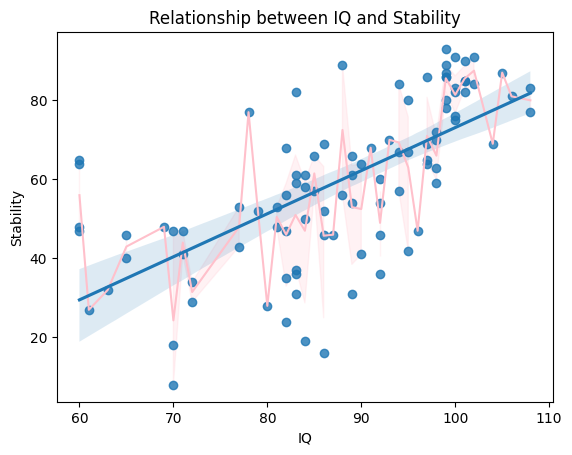

In [ ]:
sns.lineplot(data = df_iq_quality, x= 'iq', y= 'stability', color = 'pink' )
sns.regplot(data = df_iq_quality, x= 'iq', y= 'stability' )
plt.xlabel('IQ')
plt.ylabel('Stability')
plt.title('Relationship between IQ and Stability')
plt.show()

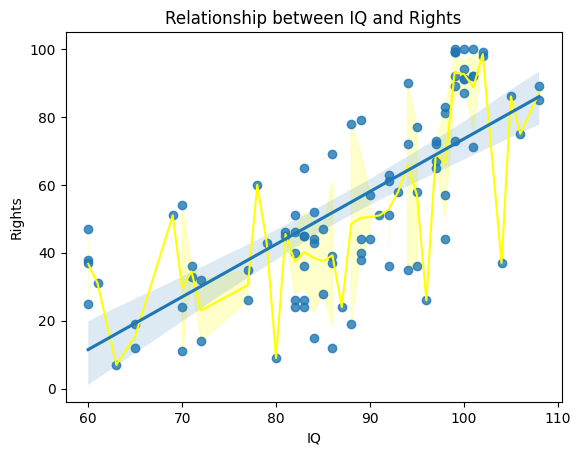

In [ ]:
sns.lineplot(data = df_iq_quality, x= 'iq', y= 'rights', color = 'yellow' )
sns.regplot(data = df_iq_quality, x= 'iq', y= 'rights' )
plt.xlabel('IQ')
plt.ylabel('Rights')
plt.title('Relationship between IQ and Rights')
plt.show()

In [ ]:
correlations2 = df.corr()['education_expenditure_per_inhabitant'].dropna()
print(correlations2.sort_values(ascending=False))

education_expenditure_per_inhabitant    1.000000
rights                                  0.804389
stability                               0.691907
male_life_expectancy                    0.639062
male_height                             0.621795
health                                  0.604932
female_height                           0.589866
male_weight                             0.578824
female_life_expectancy                  0.571404
iq                                      0.553962
male_bmi                                0.471001
safety                                  0.461695
female_weight                           0.373385
popularity                              0.152249
female_bmi                              0.129613
death_rate                              0.072017
pop_per_km_sq                          -0.034026
area                                   -0.071147
birth_rate                             -0.478746
costs                                  -0.497231
climate             

<ipython-input-40-858189484ef1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations2 = df.corr()['education_expenditure_per_inhabitant'].dropna()


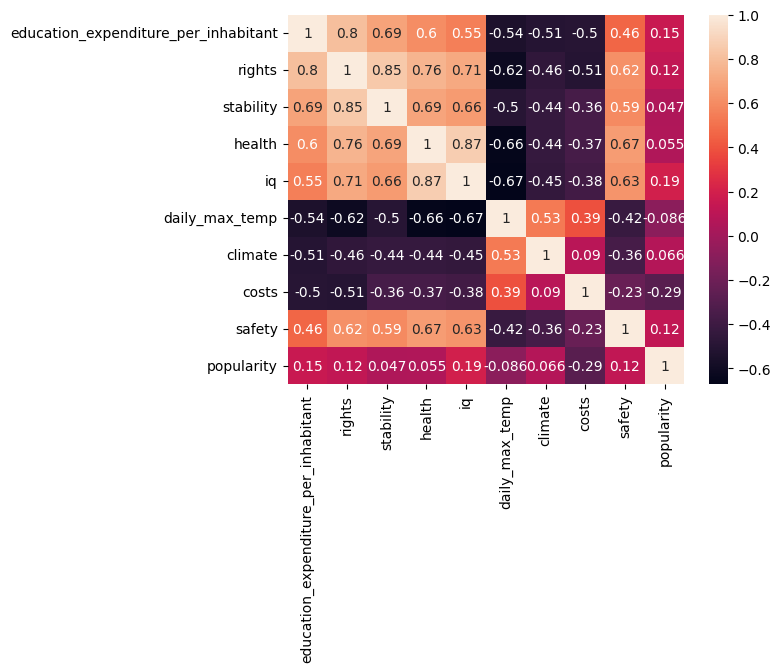

In [ ]:
columns_of_interest3 = ['education_expenditure_per_inhabitant',  'rights', 
        'stability', 'health', 'iq', 'daily_max_temp', 'climate', 'costs', 
        'safety', 'popularity']
df_edexp_quality = df[columns_of_interest3]
sns.heatmap(df_edexp_quality.corr(), 
            xticklabels=True, 
            yticklabels=True,
            annot=True);

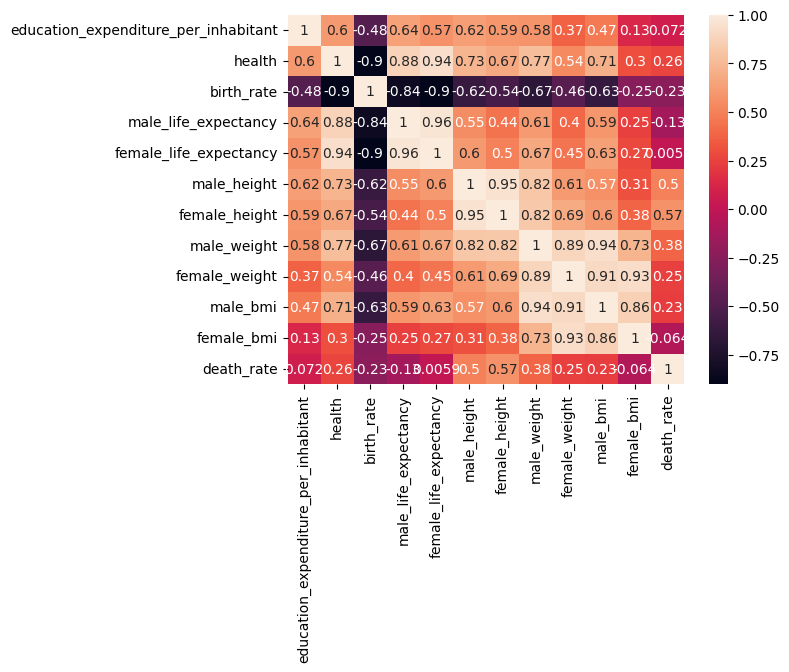

In [ ]:
columns_of_interest4 = ['health', 
        'birth_rate', 'male_life_expectancy', 'female_life_expectancy', 
        'male_height', 'female_height', 'male_weight', 'female_weight',
        'male_bmi', 'female_bmi', 'death_rate']
df_edexp_health = df[columns_of_interest4]
sns.heatmap(df_edexp_health.corr(), 
            xticklabels=True, 
            yticklabels=True,
            annot=True);

In [ ]:
# calculate correlation coeff between health and all other variables and sort
correlations3 = df.corr()['health'].dropna()
print(correlations3.sort_values(ascending=False))

health                                  1.000000
female_life_expectancy                  0.939634
male_life_expectancy                    0.879709
iq                                      0.869019
male_weight                             0.772444
rights                                  0.761785
male_height                             0.727495
male_bmi                                0.705656
stability                               0.693995
female_height                           0.666702
safety                                  0.665243
education_expenditure_per_inhabitant    0.604932
female_weight                           0.537620
female_bmi                              0.299138
death_rate                              0.261467
pop_per_km_sq                           0.065392
popularity                              0.055298
area                                    0.035834
costs                                  -0.365072
climate                                -0.435529
daily_max_temp      

<ipython-input-7-19613836654b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations3 = df.corr()['health'].dropna()


In [ ]:
# sort using absolute value to rank strongest correlations
correlations3 = df.corr()['health'].dropna()
print(abs(correlations3).sort_values(ascending=False))

health                                  1.000000
female_life_expectancy                  0.939634
birth_rate                              0.901974
male_life_expectancy                    0.879709
iq                                      0.869019
male_weight                             0.772444
rights                                  0.761785
male_height                             0.727495
male_bmi                                0.705656
stability                               0.693995
female_height                           0.666702
safety                                  0.665243
daily_max_temp                          0.657592
education_expenditure_per_inhabitant    0.604932
female_weight                           0.537620
climate                                 0.435529
costs                                   0.365072
female_bmi                              0.299138
death_rate                              0.261467
pop_per_km_sq                           0.065392
popularity          

<ipython-input-6-6b4fa558b6d8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations3 = df.corr()['health'].dropna()


Text(0.5, 1.0, 'Relationship between Health and Health Metrics')

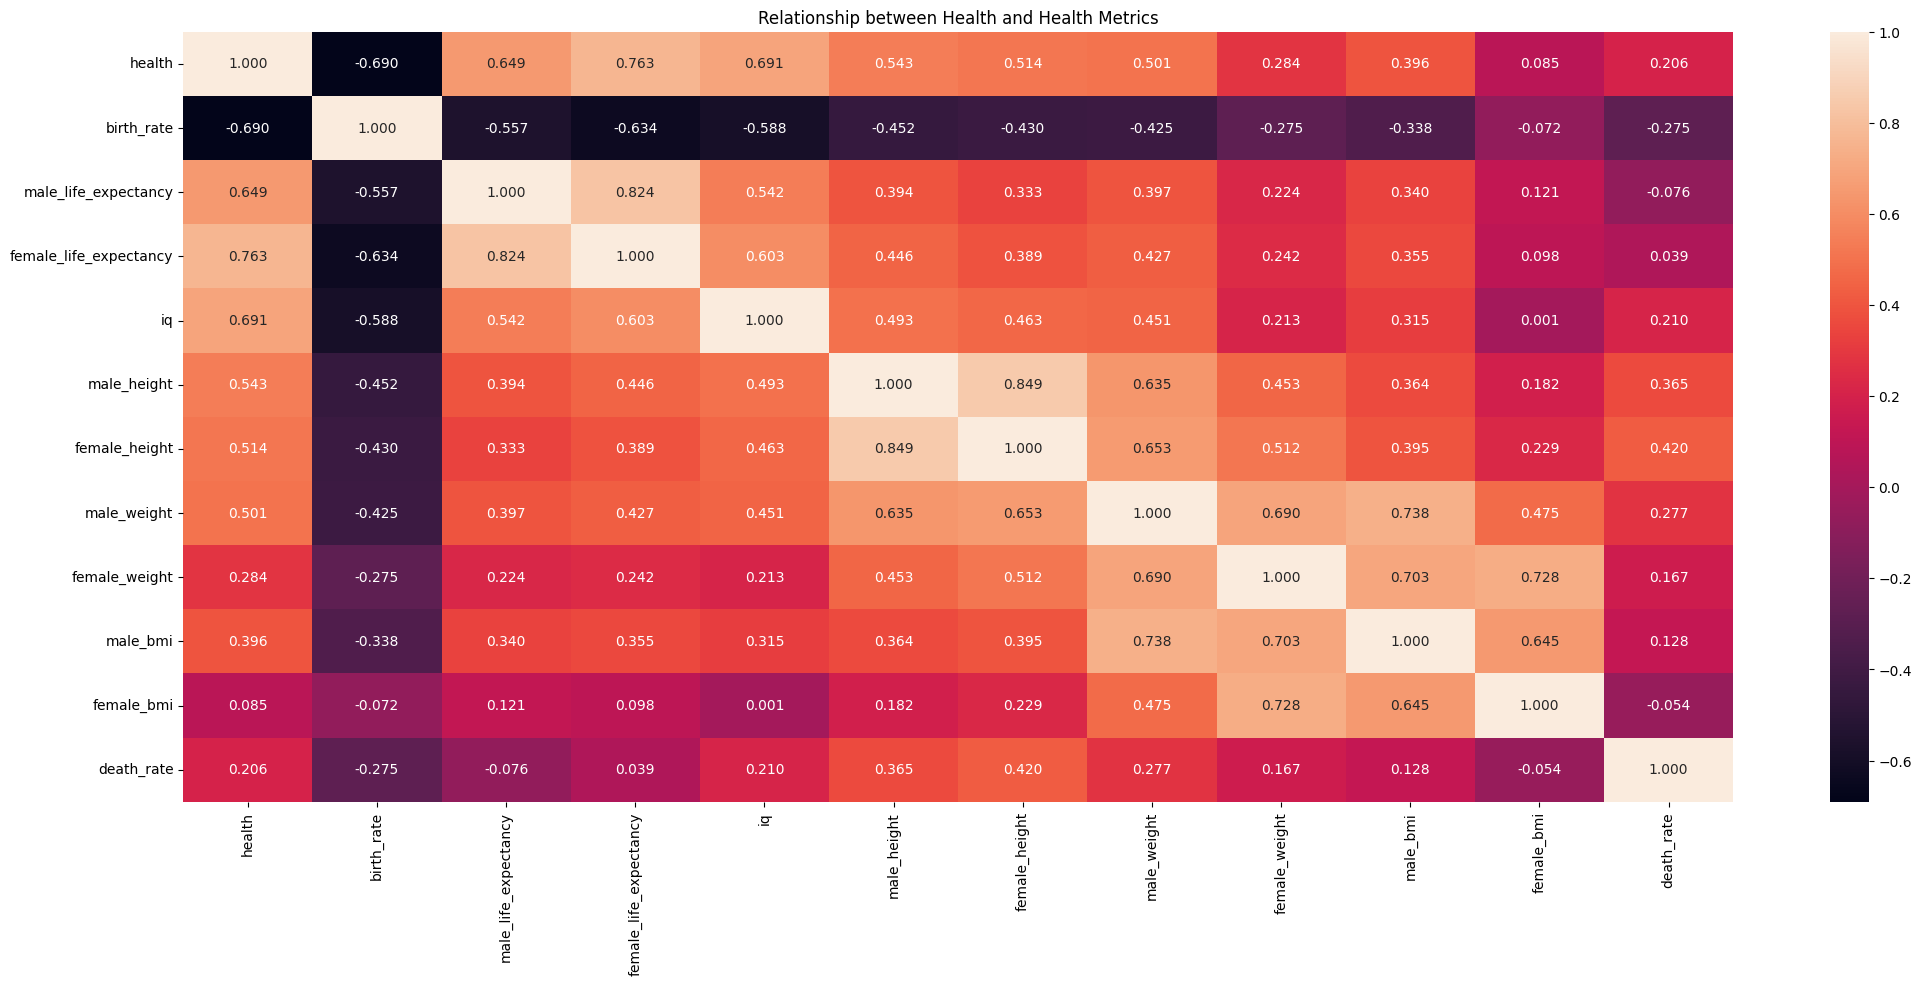

In [ ]:
# create dataframe with variables of interest
columns_of_interest5 = ['health', 'birth_rate','male_life_expectancy', 
                        'female_life_expectancy','iq', 'male_height', 
                        'female_height', 'male_weight', 'female_weight',
                        'male_bmi', 'female_bmi','death_rate']
df_health = df[columns_of_interest5]

# create heat map with variables of interest - Kendall's tau is not affected by outliers
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df_health.corr(method="kendall"), annot=True, fmt=".3f", ax=ax)
plt.title('Relationship between Health and Health Metrics')

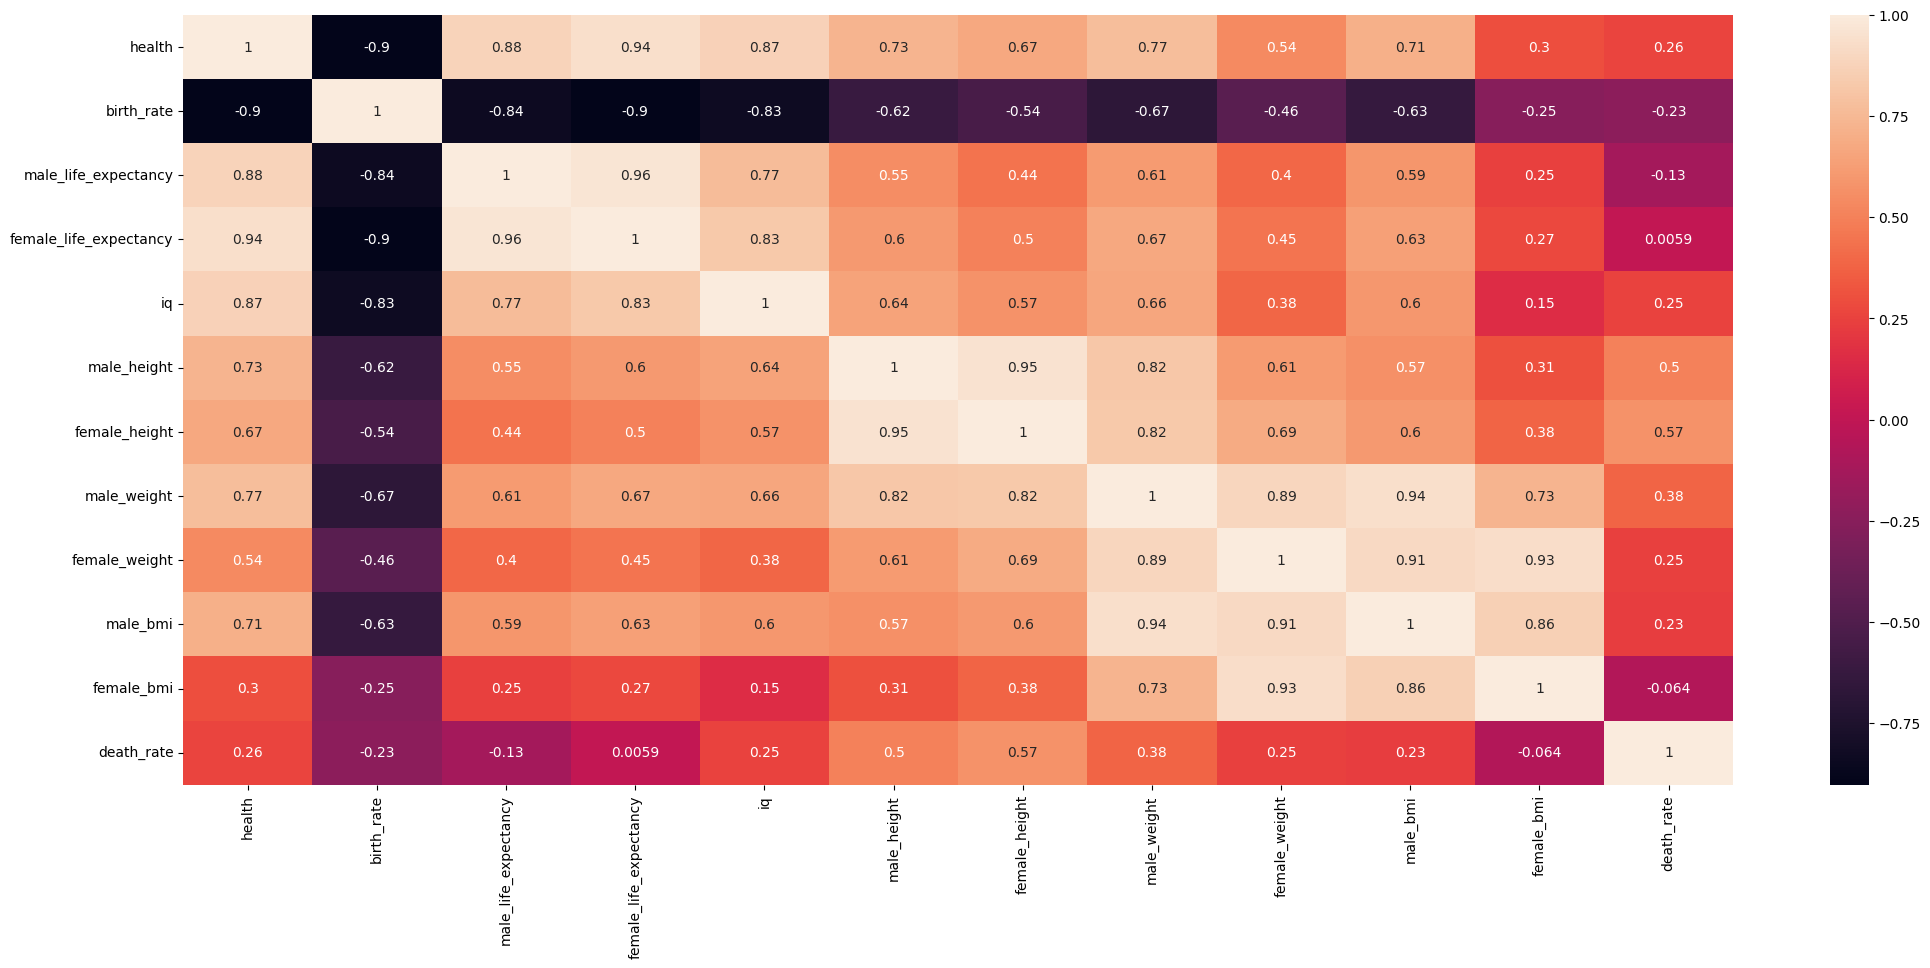

In [ ]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df_health.corr(), 
            xticklabels=True, 
            yticklabels=True,
            annot=True);

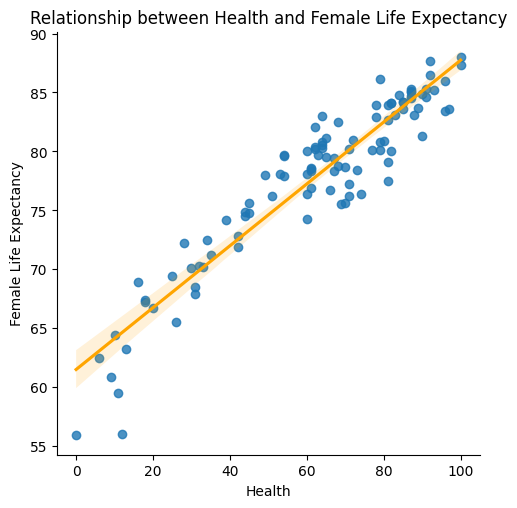

In [ ]:
sns.lmplot(data = df_health, x= 'health', y= 'female_life_expectancy', line_kws = {'color': 'orange'} )
plt.xlabel('Health')
plt.ylabel('Female Life Expectancy')
plt.title('Relationship between Health and Female Life Expectancy')
plt.show()


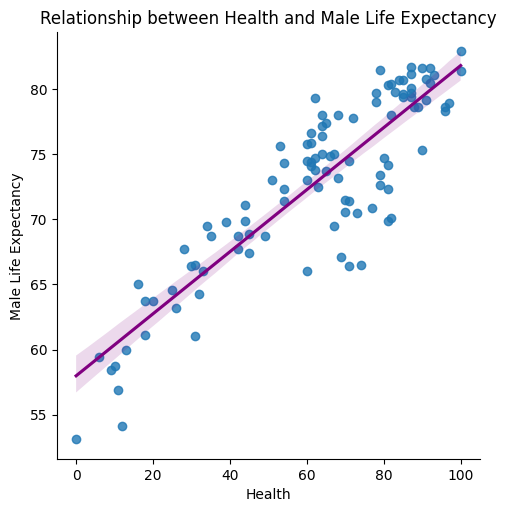

In [ ]:
sns.lmplot(data = df_health, x= 'health', y= 'male_life_expectancy', line_kws = {'color': 'purple'} )
plt.xlabel('Health')
plt.ylabel('Male Life Expectancy')
plt.title('Relationship between Health and Male Life Expectancy')
plt.show()

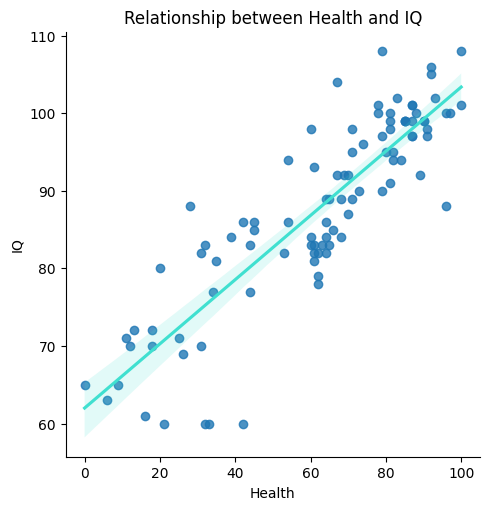

In [ ]:
sns.lmplot(data = df_health, x= 'health', y= 'iq', line_kws = {'color': 'turquoise'} )
plt.xlabel('Health')
plt.ylabel('IQ')
plt.title('Relationship between Health and IQ')
plt.show()

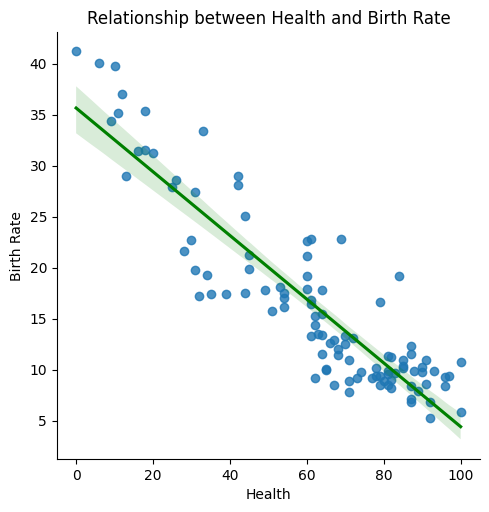

In [ ]:
sns.lmplot(data = df_health, x= 'health', y= 'birth_rate', line_kws = {'color': 'green'} )
plt.xlabel('Health')
plt.ylabel('Birth Rate')
plt.title('Relationship between Health and Birth Rate')
plt.show()

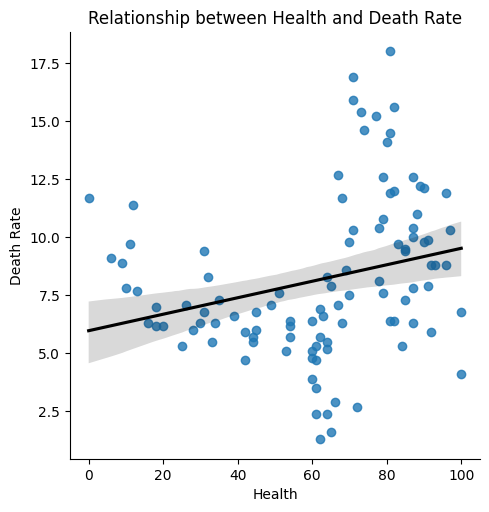

In [ ]:
sns.lmplot(data = df_health, x= 'health', y= 'death_rate', line_kws = {'color': 'black'} )
plt.xlabel('Health')
plt.ylabel('Death Rate')
plt.title('Relationship between Health and Death Rate')
plt.show()

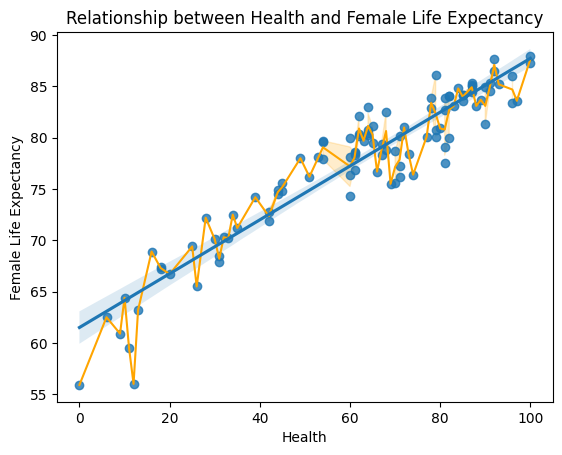

In [ ]:
sns.lineplot(data = df_health, x='health', y= 'female_life_expectancy', color = 'orange')
sns.regplot(data = df_health, x='health', y= 'female_life_expectancy')
plt.xlabel('Health')
plt.ylabel('Female Life Expectancy')
plt.title('Relationship between Health and Female Life Expectancy')
plt.show()

<Axes: xlabel='health', ylabel='iq'>

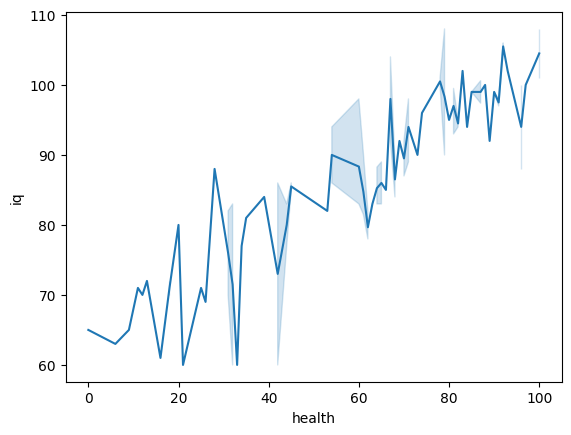

In [ ]:
sns.lineplot(data = df_health, x='health', y= 'iq')

/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.9/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, 

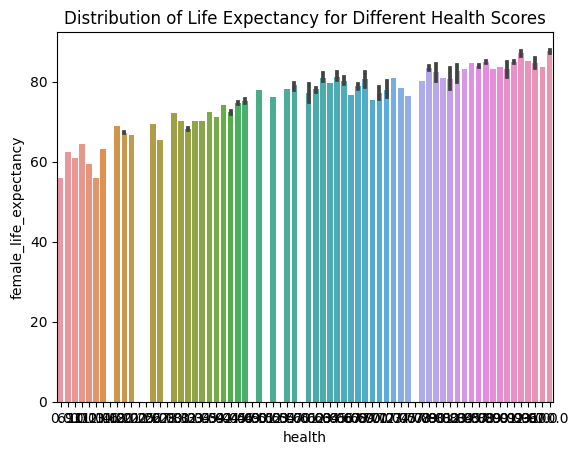

In [ ]:
sns.barplot(data = df_health, y='female_life_expectancy', x= 'health')
plt.title('Distribution of Life Expectancy for Different Health Scores')
plt.show()

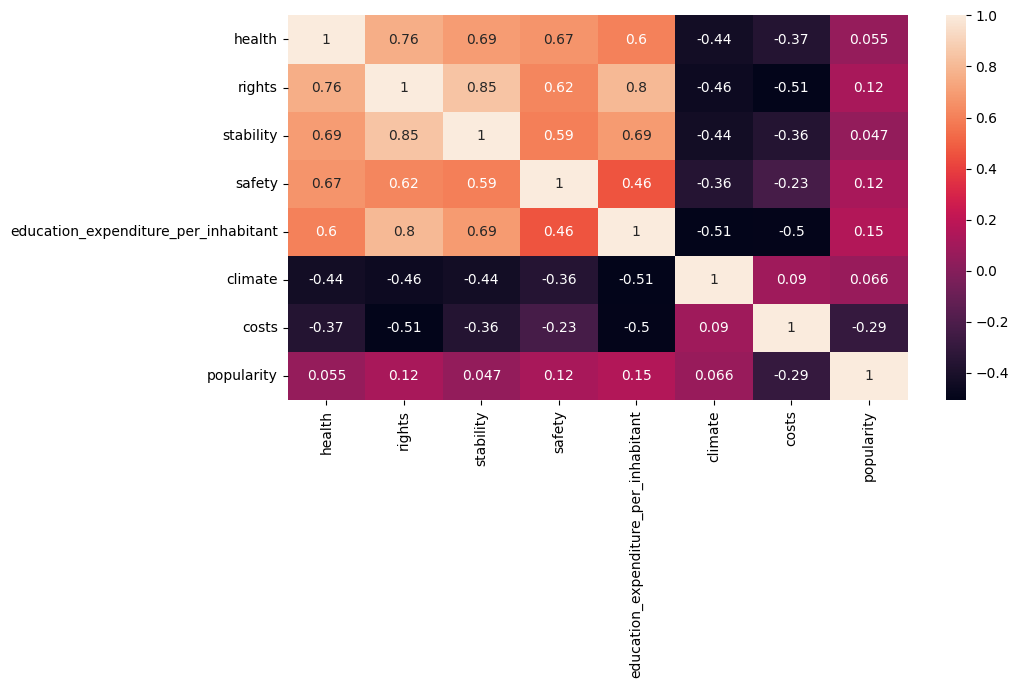

In [ ]:
columns_of_interest6 = ['health', 'rights','stability','safety',
                        'education_expenditure_per_inhabitant', 'climate',
                        'costs', 'popularity']
df_health_qol = df[columns_of_interest6]
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_health_qol.corr(), 
            xticklabels=True, 
            yticklabels=True,
            annot=True);

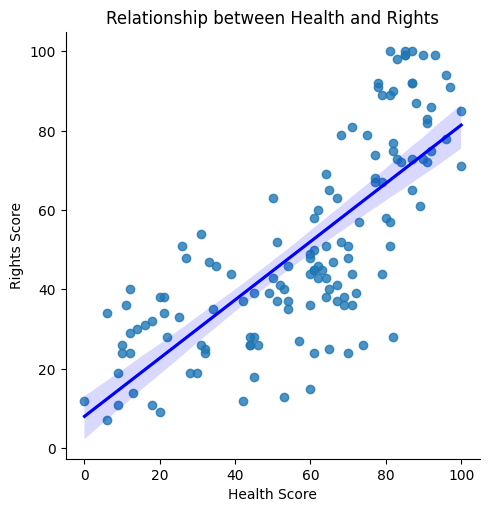

In [ ]:
sns.lmplot(data = df_health_qol, x= 'health', y= 'rights', line_kws = {'color': 'blue'})
plt.xlabel('Health Score')
plt.ylabel('Rights Score')
plt.title('Relationship between Health and Rights')
plt.show()

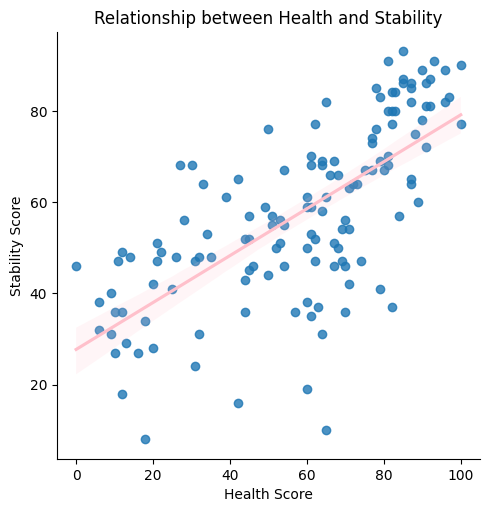

In [ ]:
sns.lmplot(data = df_health_qol, x= 'health', y= 'stability', line_kws = {'color': 'pink'})
plt.xlabel('Health Score')
plt.ylabel('Stability Score')
plt.title('Relationship between Health and Stability')
plt.show()

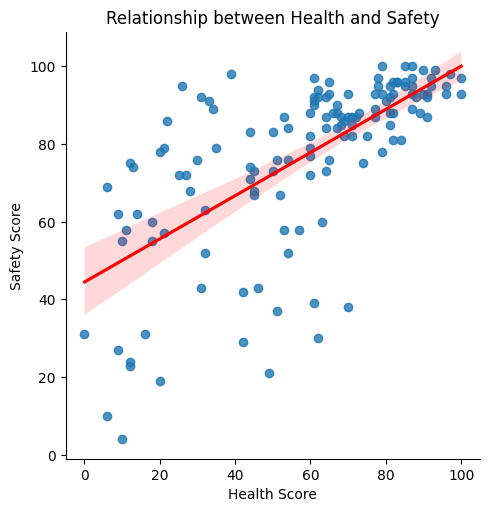

In [ ]:
sns.lmplot(data = df_health_qol, x= 'health', y= 'safety', line_kws = {'color': 'red'})
plt.xlabel('Health Score')
plt.ylabel('Safety Score')
plt.title('Relationship between Health and Safety')
plt.show()

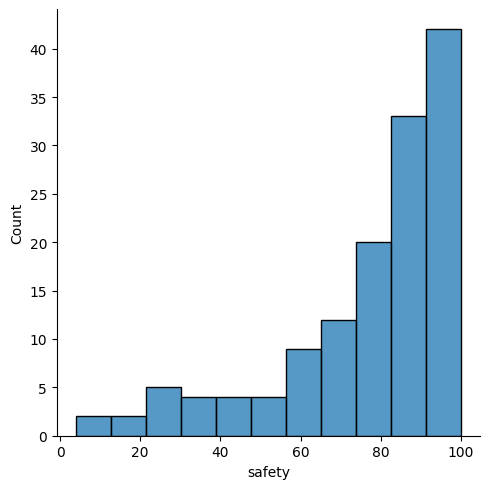

In [ ]:
sns.displot(x = df["safety"])

In [ ]:
df_health.describe()

,health,birth_rate,male_life_expectancy,female_life_expectancy,iq,male_height,female_height,male_weight,female_weight,male_bmi,female_bmi,death_rate
count,137.000000,115.000000,115.000000,115.000000,108.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,115.000000
mean,58.124088,16.917391,72.004348,76.963478,86.574074,173.666667,161.277778,78.946825,68.940476,26.069048,26.420635,8.197391
std,26.093284,9.091969,7.261318,7.548188,13.176873,5.323157,4.593280,11.270930,9.773042,2.680999,2.962359,3.314732
min,0.000000,5.300000,51.500000,55.900000,56.000000,159.000000,151.000000,53.900000,49.000000,20.100000,21.000000,1.300000
25%,42.000000,9.850000,67.550000,73.500000,81.000000,170.000000,158.000000,70.150000,62.250000,24.325000,24.625000,6.000000
50%,63.000000,13.500000,73.200000,78.600000,88.000000,174.000000,161.000000,81.500000,70.400000,26.600000,26.300000,7.600000
75%,80.000000,21.150000,78.150000,82.950000,98.000000,178.000000,165.000000,87.525000,74.000000,27.600000,27.700000,9.950000
max,100.000000,41.400000,82.900000,88.000000,108.000000,184.000000,170.000000,103.700000,98.100000,33.100000,35.200000,18.000000


In [ ]:
df['health'].describe()

count    137.000000
mean      58.124088
std       26.093284
min        0.000000
25%       42.000000
50%       63.000000
75%       80.000000
max      100.000000
Name: health, dtype: float64

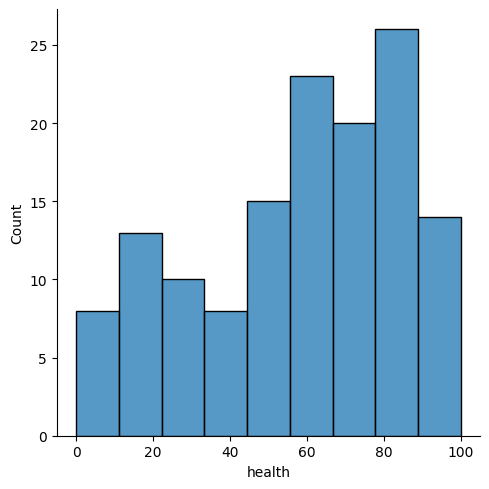

In [ ]:
sns.displot(x = df["health"])

In [ ]:
df["health"].dropna().sort_values(ascending=False)

country
Hong Kong                100.0
Macao                    100.0
Austria                   97.0
Bermuda                   96.0
Germany                   96.0
                         ...  
Cameroon                   9.0
Burundi                    9.0
Congo (Dem. Republic)      6.0
Sierra Leone               6.0
Chad                       0.0
Name: health, Length: 137, dtype: float64

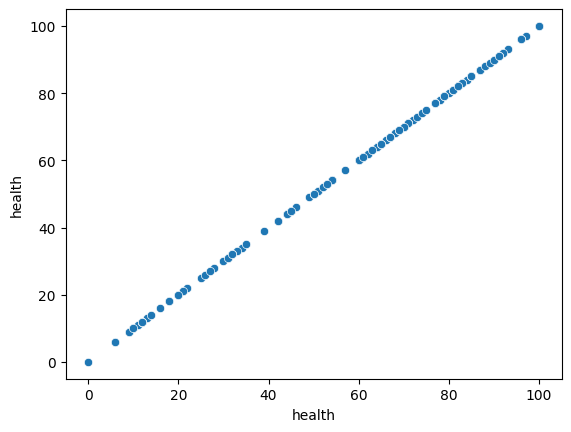

In [ ]:
scatterplot1 = sns.scatterplot(x = 'health', y = 'health', data = df)

In [ ]:
# calculate correlation coeff between health and all other variables and sort
correlations4 = df.corr()['female_bmi'].dropna()
print(correlations4.sort_values(ascending=False))
print(abs(correlations4.sort_values(ascending=False)))

female_bmi                              1.000000
female_weight                           0.932916
male_bmi                                0.861165
male_weight                             0.728642
female_height                           0.382850
male_height                             0.307775
health                                  0.299138
female_life_expectancy                  0.273751
male_life_expectancy                    0.247746
rights                                  0.179470
safety                                  0.176072
iq                                      0.154940
education_expenditure_per_inhabitant    0.129613
stability                               0.068683
area                                    0.058649
climate                                -0.017004
costs                                  -0.059494
death_rate                             -0.064285
popularity                             -0.136445
daily_max_temp                         -0.137722
pop_per_km_sq       

<ipython-input-45-00ee0f8ee922>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations4 = df.corr()['female_bmi'].dropna()


# How the dataframe was created


This section is not relevant for doing the project, you can ignore it.

In case the dataset needs to be recreated, or if you are a very curious student, this is how it was done (on a local machine, _not_ in Colab):

```python
import pandas as pd
import glob
from functools import reduce

# 1. Download and extract data from
#    https://www.kaggle.com/datasets/madhurpant/world-population-data

# 2. Merge all dataframes
joint_df = reduce(
    lambda df1, df2: df1.merge(df2, on="country", how="outer"),
    [pd.read_csv(path) for path in glob.glob("world-population-data/*")],
)

# 3. Make "country" the index
joint_df.set_index(["country"], inplace=True)

# 4. Save the result
joint_df.to_csv("world-population-data.csv")
```